In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

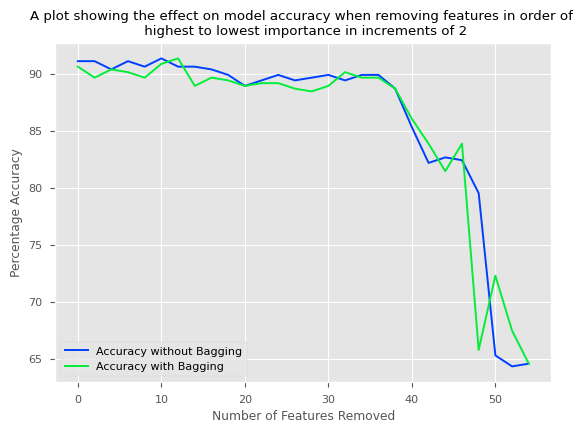

In [17]:
unbagged=np.zeros(28)
bagged=np.zeros(28)

for i in range(0,28):
    results = pd.read_csv('..\\automated_variable_results\\accuracies for rm' + str(2*i) + '.csv')
    unbagged[i] = results['accuracy'][0]
    bagged[i] = results['accuracy'][1]

plt.style.use('seaborn-v0_8-paper')
fig, ax = plt.subplots()
ax.plot(np.arange(0,56,2),bagged,label='Accuracy without Bagging')
ax.plot(np.arange(0,56,2),unbagged,label='Accuracy with Bagging')
ax.set_xlabel('Number of Features Removed')
ax.set_ylabel('Percentage Accuracy')
ax.legend()
ax.set_title('A plot showing the effect on model accuracy when removing features in order of \n highest to lowest importance in increments of 2')
plt.show()